# 課題2(Optional) wikipediaリンクで遊ぼう

## Googleから10ステップ以内でいけるリンクを探してみる編

### 準備 

In [0]:
!pip install japanize-matplotlib

In [0]:
from google.colab import auth, drive, files, output
drive.mount('/content/drive')

In [0]:
import os
os.chdir("/content/drive/My Drive/STEP2020")

In [0]:
#pagesの読み込み
f1 = open('txt/wikipedia/pages.txt')
pages = f1.read()
f1.close()
n_pages = pages.split("\n")
pages = [n_pages[i].split("\t")[1] for i in range(len(n_pages)-1)] #最後に空行が入っていたので．
del n_pages[:]
#pages[:5] #確認用

In [0]:
#page名から番号を検索できるようにしておく．
pagename2num = dict()
for i in range(len(pages)):
    pagename2num[pages[i]] = i
#pagename2num #確認用

In [0]:
f1 = open('txt/wikipedia/links.txt')
links = f1.read()
f1.close()
n_links = links.split("\n")
links = [tuple(map(int, n_links[i].split('\t'))) for i in range(len(n_links)-1)] #最後に空行が入っていたので．
#メモリ解放
del n_links[:]

In [0]:
#隣接行列を作成
direct_neighbors = [[] for i in range(len(pages))]
for link in links:
    direct_neighbors[link[0]].append(link[1])
#direct_neighbors[:2] #確認用

In [0]:
del links[:]

### BFSで実装

In [10]:
import time
from collections import deque

def bfs(direct_neighbors, visited, start, n):
    q = deque()
    q.append(start)
    visited[start][1] = 0
    while len(q) > 0:
        current_node = q.popleft()
        if not visited[current_node][0]:
            visited[current_node][0] = True
            if visited[current_node][1] < n:
                for next_node in direct_neighbors[current_node]:
                    if not visited[next_node][0]:
                        q.append(next_node)
                        visited[next_node][1] = visited[current_node][1] + 1

n = 10
start = pagename2num['Google']
visited = [[False, float('inf')] for i in range(len(pages))]
bfs_time_start = time.time()
bfs(direct_neighbors, visited, start, n)
visited[start][0] = False
nums = [0 for i in range(n)]
count = 0
for i in range(len(visited)):
    if visited[i][0]:
        nums[visited[i][1]-1] += 1
for i in range(n):
    print('{}回目に繋がるページ：'.format(i+1), nums[i])
print('{}回目までに繋がるページの合計'.format(n), sum(nums))
bfs_time_finish = time.time()

print()
print('n=1のときの計算時間：', 0.13612890243530273)
print('n=2のときの計算時間：', 0.15564370155334473)
print('n=3のときの計算時間：', 0.301257848739624)
print('n=4のときの計算時間：', 0.8336825370788574)
print('n=5のときの計算時間：', 1.8753483295440674)
print('n=6のときの計算時間：', 3.1013340950012207)
print('n=7のときの計算時間：', 4.53085994720459)
print('n=8のときの計算時間：', 5.5169689655303955)
print('n=9のときの計算時間：', 6.7101123332977295)
print('n=10のときの計算時間：', bfs_time_finish - bfs_time_start)

1回目に繋がるページ： 61
2回目に繋がるページ： 493
3回目に繋がるページ： 1569
4回目に繋がるページ： 3835
5回目に繋がるページ： 8172
6回目に繋がるページ： 18082
7回目に繋がるページ： 38566
8回目に繋がるページ： 80051
9回目に繋がるページ： 167466
10回目に繋がるページ： 540290
10回目までに繋がるページの合計 858585

n=1のときの計算時間： 0.13612890243530273
n=2のときの計算時間： 0.15564370155334473
n=3のときの計算時間： 0.301257848739624
n=4のときの計算時間： 0.8336825370788574
n=5のときの計算時間： 1.8753483295440674
n=6のときの計算時間： 3.1013340950012207
n=7のときの計算時間： 4.53085994720459
n=8のときの計算時間： 5.5169689655303955
n=9のときの計算時間： 6.7101123332977295
n=10のときの計算時間： 7.692875623703003


In [0]:
#結果の可視化の準備
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [0]:
ns = [i+1 for i in range(10)]
new_pages = [61, 493, 1569, 3835, 8172, 18082, 38566, 80051, 167466, 540290]
total_pages = [sum(new_pages[:i]) for i in range(1,11)]
calc_times = [0.13612890243530273, 0.15564370155334473, 0.301257848739624, 0.8336825370788574, 1.8753483295440674, 3.1013340950012207, 4.53085994720459, 5.5169689655303955, 6.7101123332977295, 8.113380670547485]

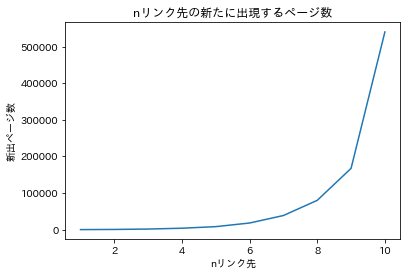

In [13]:
plt.title("nリンク先の新たに出現するページ数")
plt.xlabel("nリンク先")
plt.ylabel("新出ページ数")
plt.plot(ns, new_pages)

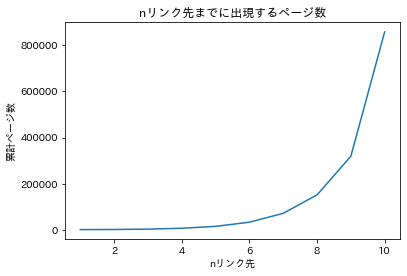

In [14]:
plt.title("nリンク先までに出現するページ数")
plt.xlabel("nリンク先")
plt.ylabel("累計ページ数")
plt.plot(ns, total_pages)

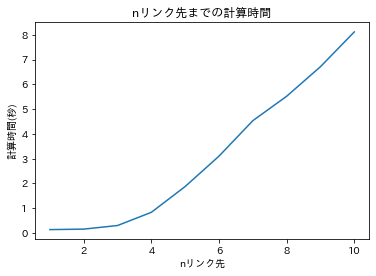

In [15]:
#意外と線形
plt.title("nリンク先までの計算時間")
plt.xlabel("nリンク先")
plt.ylabel("計算時間(秒)")
plt.plot(ns, calc_times)